In [1]:
import numpy as np
import matplotlib.pyplot as plt

width, height = 8, 4
res = 10
field_shape =[height*res, width*res]

charges= [
    {
        "c":1.0, 
        "p":np.array([-4,0])
    },
    {
        "c":-1.0, 
        "p":np.array([0,0])
    },
    {
        "c":1.0, 
        "p":np.array([4,0])
    },
]
num_charges = len(charges)

x,y = np.meshgrid(np.linspace(-width/2, width/2, width*res), np.linspace(-height/2 ,height/2 ,height*res))
u = np.empty(field_shape)
v = np.empty(field_shape)
res = np.empty([1,2])
colors = np.empty(field_shape)

In [11]:
class VectorField:
    def __init__(self, field: np.ndarray):
        self.field = field
        self.field_shape = field.shape
    
    def normalise(self):
        for j in range(self.field_shape[0]):
            for i in range(self.field_shape[1]):
                dir = self.field[j,i]
                mag_squared = np.dot(dir,dir)                
                mag = np.sqrt(mag_squared)

                self.field[j,i] = dir/mag

vf = VectorField(np.array([[[1, 1],[-1, 1]],[[1, -1],[-1, -1]]]))
print(vf.field)
vf.normalise()
print(vf.field)

[[[ 1  1]
  [-1  1]]

 [[ 1 -1]
  [-1 -1]]]
[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]


In [2]:
def calc_vec(x,y):
    pos = np.array([x,y])
    total_vec = np.zeros_like(pos)
        
    for charge in charges:
       dir = pos - charge["p"]
       dist_squared = dir[0]**2 + dir[1]**2
       if dist_squared == 0.0:
           continue
       dist = np.sqrt(dist_squared)
       normalised_dir = dir/dist
       f = charge["c"]/dist_squared
       total_vec += normalised_dir * f
    
    # print(pos, total_force_vec)
    total_vec_dist = np.sqrt(total_vec.dot(total_vec))
    return [total_vec/total_vec_dist,total_vec_dist]

def calc_e_field(index) -> np.array:
    norm_x = np.empty(field_shape)
    norm_y = np.empty(field_shape)
    mag = np.empty(field_shape)
    
    for j in range(field_shape[0]):
        for i in range(field_shape[1]):
            charge = charges[index]

            pos = np.array([x[j, i], y[j, i]])
            dir = (charge["p"]-pos)*charge["c"]
            dist_squared = np.dot(dir,dir)
            norm_dir = dir/np.sqrt(dist_squared)
            f = 1/dist_squared

            
            norm_x[j,i] = norm_dir[0]
            norm_y[j,i] = norm_dir[1]
            mag[j,i] = f
            
    return [norm_x, norm_y, mag]


In [3]:

charge_fields = [calc_e_field(i) for i in range(len(charges))]


total_e_field = [np.zeros(field_shape),np.zeros(field_shape),np.zeros(field_shape)]
for charge_field in charge_fields:
    total_e_field[0] += charge_field[0] * charge_field[2]
    total_e_field[1] += charge_field[1] * charge_field[2]

for j in range(field_shape[0]):
    for i in range(field_shape[1]):
        dir = np.array([total_e_field[0][j,i], total_e_field[1][j,i]])/num_charges
        mag = np.sqrt(np.dot(dir,dir))

        norm = dir/mag

        total_e_field[0][j,i] = norm[0]
        total_e_field[1][j,i] = norm[1]
        total_e_field[2][j,i] = mag

In [4]:
def calc_charge_vel(index):
    charge = charges[index]
    pos = charge["p"]

    force_vec = np.shape((2,0))
    for i in range(len(charges)):
        if i == index:
            continue

        cur_charge = charges[i]
        dir = cur_charge["p"] - pos
        dist_squared = np.dot(dir,dir)

        if dist_squared == 0:
            continue

        norm_dir = dir/np.sqrt(dist_squared)
        f = cur_charge["c"]/dist_squared

        force_vec += norm_dir * f
    
    return force_vec

In [5]:
print(calc_charge_vel(0))
print(calc_charge_vel(1))
print(calc_charge_vel(2))

[1.953125 2.      ]
[2. 2.]
[2.046875 2.      ]


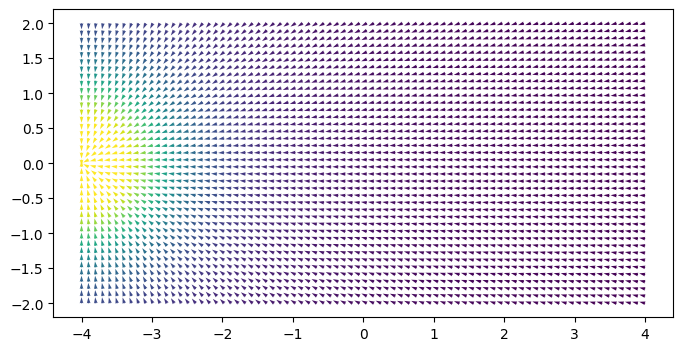

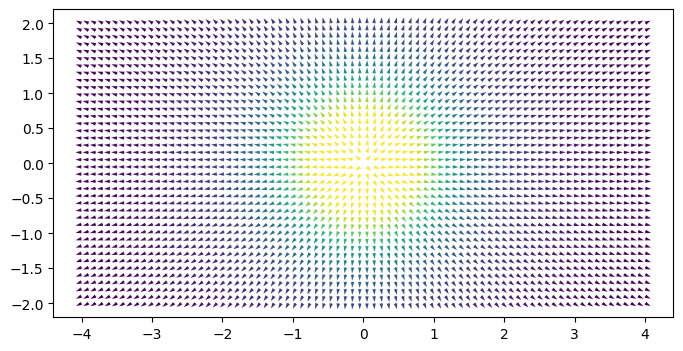

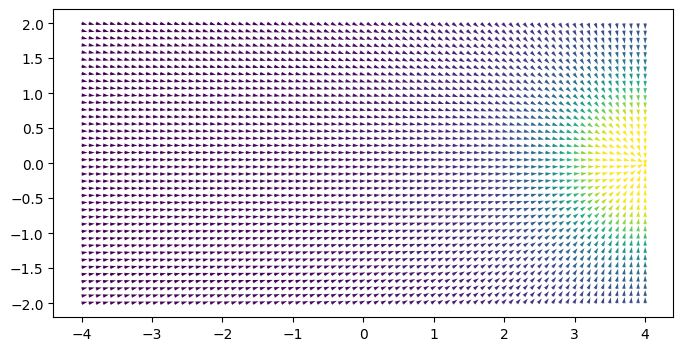

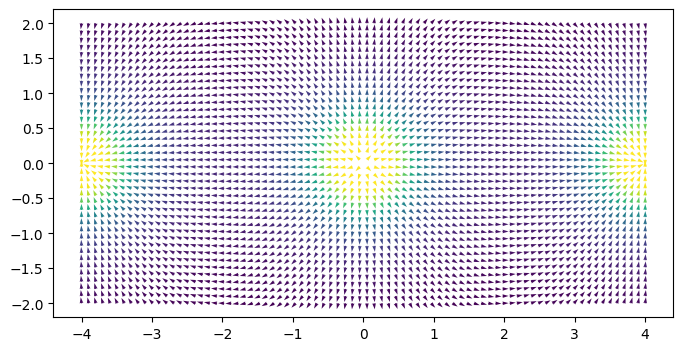

In [6]:
# plt.savefig('filename.png', dpi=1500)

def plot_field(x,y,field):
    plt.figure().set_size_inches(width, height)
    plt.quiver(
        x,
        y,
        field[0],
        field[1],
        np.tanh(field[2])
    )
    plt.show()

plot_field(x,y,charge_fields[0])
plot_field(x,y,charge_fields[1])
plot_field(x,y,charge_fields[2])
plot_field(x,y,total_e_field)